In [17]:
import tabulate
import torch
import torchvision
import matplotlib.pyplot as plt

# Load observations from the mnist dataset. The observations are divided into a training set and a test set
mnist_train = torchvision.datasets.MNIST('./data', train=True, download=True)
x_train = mnist_train.data.reshape(-1, 784).float()  # Reshape input
y_train = torch.zeros((mnist_train.targets.shape[0], 10))  # Create output tensor
y_train[torch.arange(mnist_train.targets.shape[0]), mnist_train.targets] = 1  # Populate output

mnist_test = torchvision.datasets.MNIST('./data', train=False, download=True)
x_test = mnist_test.data.reshape(-1, 784).float()  # Reshape input
y_test = torch.zeros((mnist_test.targets.shape[0], 10))  # Create output tensor
y_test[torch.arange(mnist_test.targets.shape[0]), mnist_test.targets] = 1  # Populate output

In [18]:
class SigmoidModel:
	
	def __init__(self):
			self.W = torch.ones([784, 10], requires_grad=True)
			self.b = torch.ones([1, 10], requires_grad=True)

	# Predictor
	def f(self, x):
			return torch.nn.functional.softmax(x @ self.W + self.b, dim=1)

	# Cross Entropy loss
	def loss(self, x, y):
			return torch.nn.functional.binary_cross_entropy_with_logits(self.f(x), y)

	def accuracy(self, x, y):
			return torch.mean(torch.eq(self.f(x).argmax(1), y.argmax(1)).float())

In [19]:
model = SigmoidModel()

learning_rate = 0.1
epoch = 10000 # 10_000

optimizer = torch.optim.SGD([model.W, model.b], lr=learning_rate)
results = []
for index, epoch in enumerate(range(epoch)):
    if (index+1) % 100 == 0:
        results.append([index+1, model.loss(x_train, y_train).item(),
                        model.accuracy(x_test, y_test).item() * 100])

    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()  # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step

print(tabulate.tabulate(results, headers=['epoch', 'loss', 'accuracy']))


  epoch      loss    accuracy
-------  --------  ----------
    100  0.672292       82.67
    200  0.66391        91.23
    300  0.664556       90.51
    400  0.666906       88.09
    500  0.663086       91.3
    600  0.664185       90.19
    700  0.662049       92.33
    800  0.661928       92.45
    900  0.661701       92.45
   1000  0.661872       92.29
   1100  0.662375       91.84
   1200  0.662805       91.5
   1300  0.661896       92.29
   1400  0.661592       92.37
   1500  0.661422       92.4
   1600  0.661177       92.68
   1700  0.662032       92.14
   1800  0.661065       92.59
   1900  0.662191       91.81
   2000  0.661627       92.37
   2100  0.661339       92.66
   2200  0.660963       92.73
   2300  0.661656       92.42
   2400  0.661514       92.29
   2500  0.661662       92.4
   2600  0.662227       91.94
   2700  0.660824       92.8
   2800  0.66106        92.76
   2900  0.661907       91.97
   3000  0.660975       92.58
   3100  0.660784       92.72
   3200  0.6607

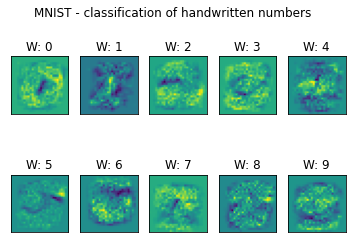

In [20]:
fig = plt.figure('Oppgave D')
fig.suptitle('MNIST - classification of handwritten numbers')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(model.W[:, i].detach().numpy().reshape(28, 28))
    plt.title(f'W: {i}')
    plt.xticks([])
    plt.yticks([])

plt.show()